In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
counties = pd.read_csv('../data/CountyData.tsv', sep='\t', encoding='utf8')

In [3]:
counties.head()

County    id  rank education income unemployment disability  \
0  Autauga, Alabama  1001  1371      21.7  53773          6.5        1.6   
1  Baldwin, Alabama  1003   657      27.7  50706          6.8          1   
2  Barbour, Alabama  1005  2941      14.5  31889         11.2        2.9   
3     Bibb, Alabama  1007  2803         9  36824          7.6        2.6   
4   Blount, Alabama  1009  2000      12.4  45192          6.2        1.4   

   life  obesity  
0  76.1     38.0  
1  77.7     34.0  
2  74.7     47.0  
3  74.2     43.0  
4  75.9     40.0

In [4]:
counties['id'].apply(lambda x: str(x).zfill(5))

0       01001
1       01003
2       01005
3       01007
4       01009
        ...  
3134    56037
3135    56039
3136    56041
3137    56043
3138    56045
Name: id, Length: 3139, dtype: object

In [5]:
counties.dtypes

County           object
id                int64
rank             object
education        object
income           object
unemployment     object
disability       object
life             object
obesity         float64
dtype: object

In [6]:
target_cols = counties.columns[2:]
counties[target_cols] = counties[target_cols].applymap(lambda x: pd.to_numeric(x, errors='coerce'))

/Users/joshuaminot/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:391: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
/Users/joshuaminot/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:392: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
/Users/joshuaminot/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/joshuaminot/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


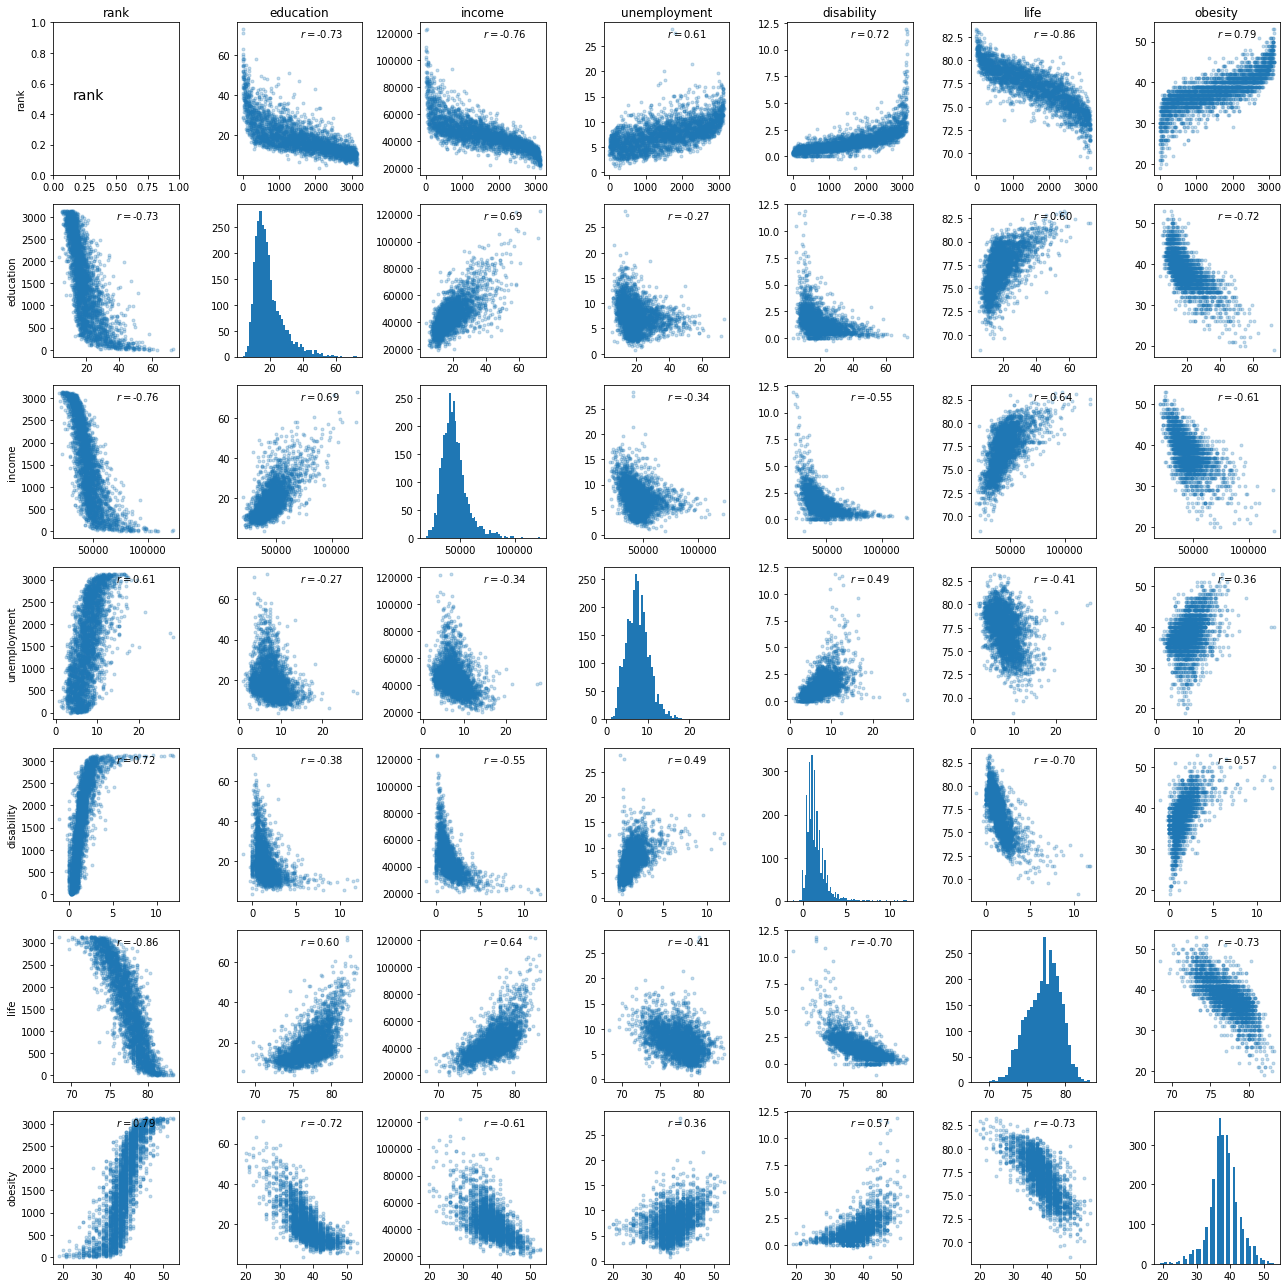

In [11]:
f,a = plt.subplots(len(target_cols),len(target_cols), figsize=(18,18))
#a=a.ravel()


for i,col_0 in enumerate(target_cols):
    print(col_0,end='\r')
    
    for j,col_1 in enumerate(target_cols):
        if i == 0:
            a[i,j].set_title(col_1)
        if j == 0:
            a[i,j].set_ylabel(col_0)
        if i == j: 
            #a[i,j].text(.15,.5,col_1,fontsize=14)
            if i==0:
                a[i,j].text(.15,.5,col_1,fontsize=14)
                continue
            a[i,j].hist(counties[col_0], bins='auto')
            continue
        a[i,j].plot(counties[col_0], counties[col_1],marker='.',linewidth=0,alpha=.25)
        temp =  counties.dropna()
        np.corrcoef(temp[col_0].values, temp[col_1].values)
        a[i,j].text(.5,.9,f'$r=${np.corrcoef(temp[col_0].values, temp[col_1].values)[1,0]:.2f}',  transform=a[i,j].transAxes)
f.tight_layout()
plt.savefig('upshot_pairplot.pdf')

In [15]:
counties['education_rank'] = counties['education'].rank(ascending=False)

In [16]:
counties

County     id    rank  education   income  unemployment  \
0        Autauga, Alabama   1001  1371.0       21.7  53773.0           6.5   
1        Baldwin, Alabama   1003   657.0       27.7  50706.0           6.8   
2        Barbour, Alabama   1005  2941.0       14.5  31889.0          11.2   
3           Bibb, Alabama   1007  2803.0        9.0  36824.0           7.6   
4         Blount, Alabama   1009  2000.0       12.4  45192.0           6.2   
...                   ...    ...     ...        ...      ...           ...   
3134  Sweetwater, Wyoming  56037   362.0       17.0  72139.0           4.6   
3135       Teton, Wyoming  56039    25.0       49.0  69020.0           6.6   
3136       Uinta, Wyoming  56041   674.0       18.3  59714.0           5.1   
3137    Washakie, Wyoming  56043   756.0       23.3  44519.0           5.4   
3138      Weston, Wyoming  56045   812.0       17.5  53802.0           5.1   

      disability  life  obesity  education_rank  
0            1.6  76.1     38.0           907.5  
1            1.0  77.7     34.0           475.5  
2            2.9  74.7     47.0          2148.0  
3            2.6  74.2     43.0          3025.5  
4            1.4  75.9     40.0          2561.0  
...          ...   ...      ...             ...  
3134         0.5  78.4     35.0          1607.5  
3135         0.2  82.1     21.0            33.0  
3136         0.8  77.4     36.0          1387.5  
3137         0.9  77.6     34.0           758.0  
3138         0.6  76.7     36.0          1523.0  

[3139 rows x 10 columns]

AttributeError: 'str' object has no attribute 'log10'

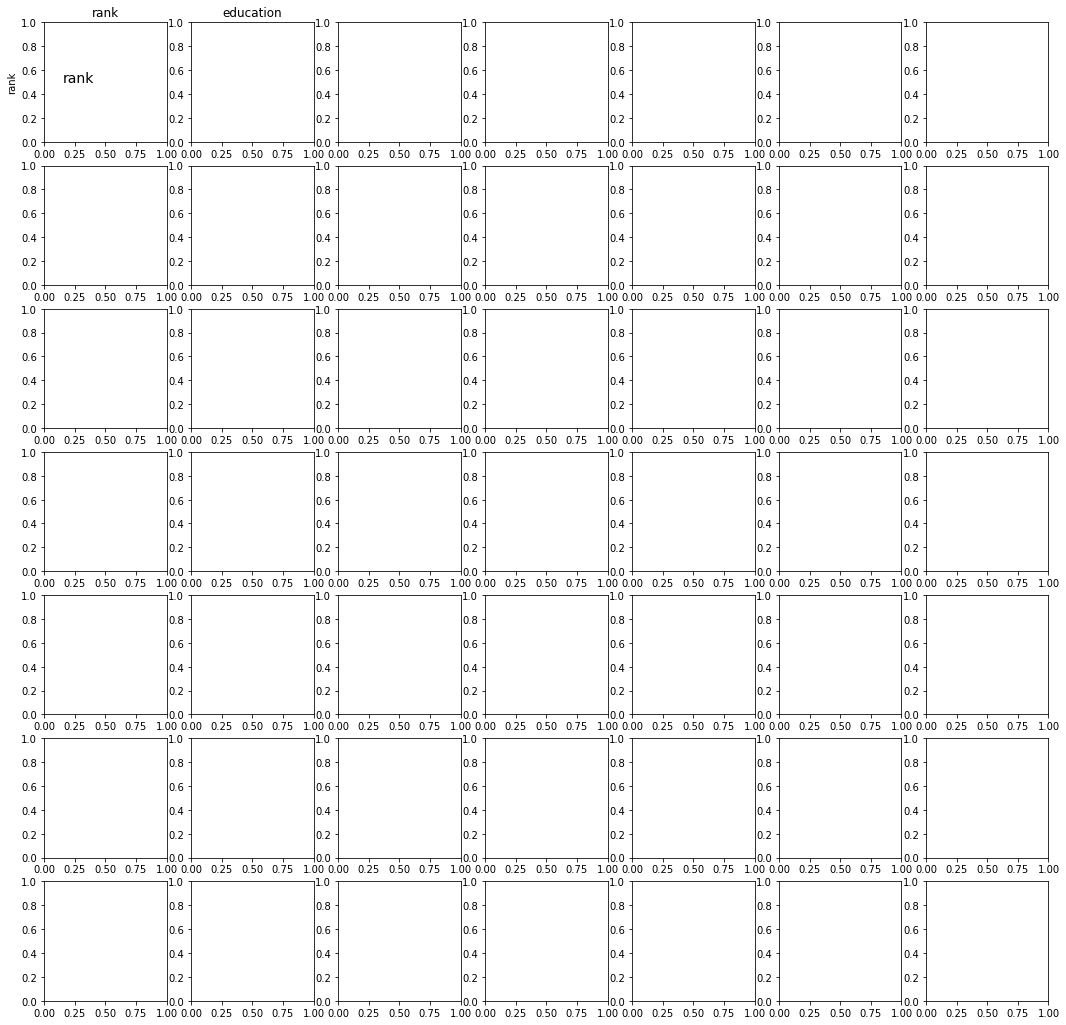

In [9]:
target_cols = counties.columns[2:]
f,a = plt.subplots(len(target_cols),len(target_cols), figsize=(18,18))
#a=a.ravel()


for i,col_0 in enumerate(target_cols):
    print(col_0,end='\r')
    
    for j,col_1 in enumerate(target_cols):
        if i == 0:
            a[i,j].set_title(col_1)
        if j == 0:
            a[i,j].set_ylabel(col_0)
        if i == j: 
            #a[i,j].text(.15,.5,col_1,fontsize=14)
            if i==0:
                a[i,j].text(.15,.5,col_1,fontsize=14)
                continue
            a[i,j].hist(counties[col_0], bins='auto')
            continue
        a[i,j].plot(np.log10(counties[col_0]), np.log10(counties[col_1]),marker='.',linewidth=0,alpha=.5)
f.tight_layout()
plt.savefig('upshot_pairplot.pdf')

In [19]:
col_1

'obesity'

In [20]:
col_0

'obesity'

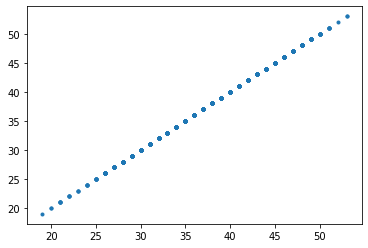

In [16]:
plt.plot(counties[col_0], counties[col_1],marker='.',linewidth=0)